In [1]:
from astropy.io import fits
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
from astropy.stats import SigmaClip
from photutils.background import Background2D,SExtractorBackground
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import little_things_functions as ltf
import cv2
#plt.gray()
galaxy_name = 'DDO69'

# import files----------------------------------------------------------------------------------------------------------------------------------------------------
light_file_u = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy\Data\DDO69\d69_u.fits")
light_u = light_file_u[0].data

light_file_b = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy\Data\DDO69\d69_b.fits")
light_b = light_file_b[0].data

light_file_v = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy\Data\DDO69\d69_v.fits")
light_v = light_file_v[0].data

box_u = (250 , 300) 
box_b = (250 , 300) 
box_v = (250 , 300) 

lights = [light_u,light_b,light_v]
boxes = [box_u,box_b,box_v]
filters = ["U" , "B" , "V"]
print(np.shape(light_u), np.shape(light_b),np.shape(light_v))

(984, 984) (877, 944) (877, 944)


In [2]:
import astroalign as aa
target_fixed = lights[0].byteswap().newbyteorder('N')
source_fixed_1 = lights[1].byteswap().newbyteorder('N')
source_fixed_2 = lights[2].byteswap().newbyteorder('N')
registered_image_1, footprint_1 = aa.register(source_fixed_1, target_fixed)
registered_image_2,  footprint_2 = aa.register(source_fixed_2, target_fixed)
list_of_aligned_images = [lights[0],registered_image_1, registered_image_2 ]
print(np.shape(list_of_aligned_images[0]),(np.shape(list_of_aligned_images[1]),np.shape(list_of_aligned_images[2])))
aligned = list_of_aligned_images

(984, 984) ((984, 984), (984, 984))


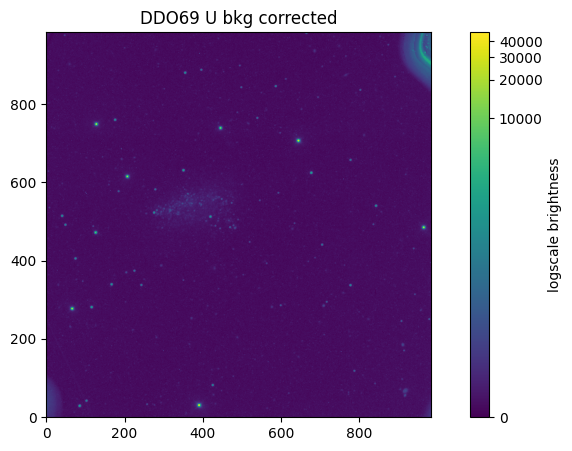

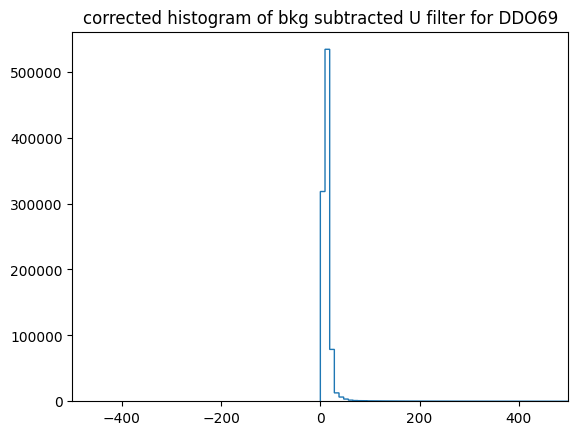

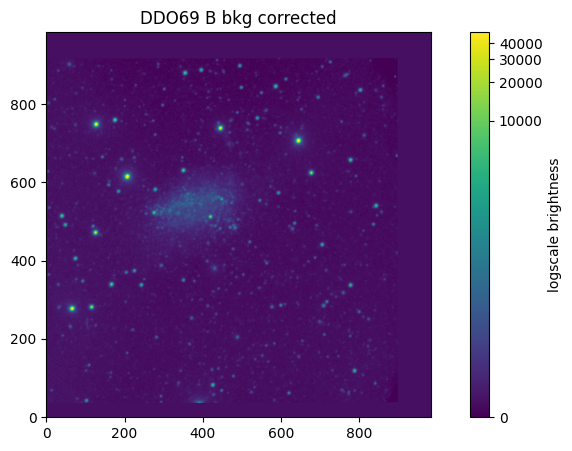

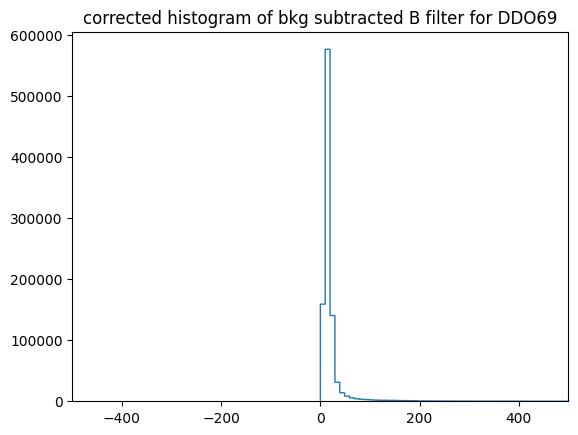

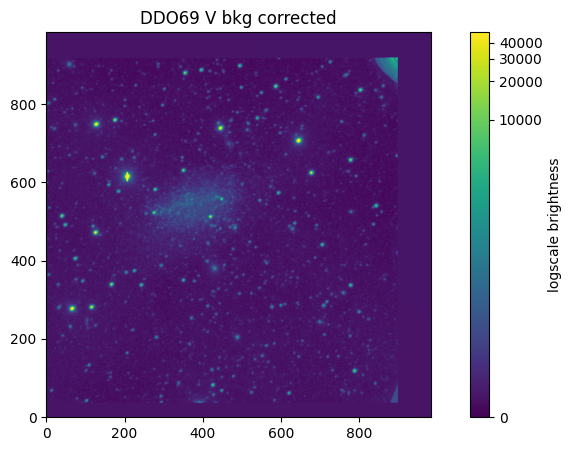

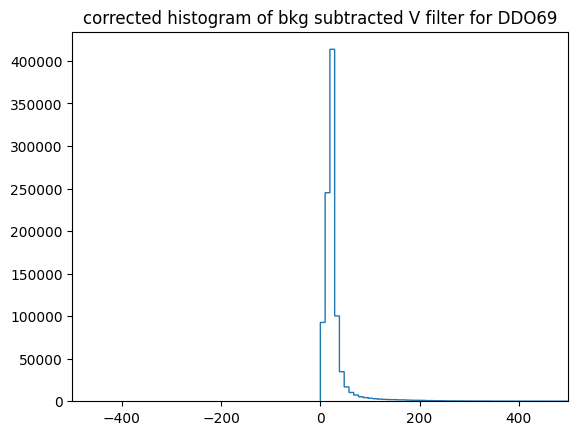

In [3]:
corrected = ltf.background_subtraction(aligned,3,boxes,(3,3))
for i in range(0,3):
    ltf.log_scale_plot(corrected[i],"%s %s bkg corrected"%(galaxy_name,filters[i]),"logscale brightness")
    output_filename = '%s_%s_background_subtracted.fits'%(galaxy_name,filters[i])
    # Create a PrimaryHDU (header/data unit) from your array
    primary_hdu = fits.PrimaryHDU(corrected[i])
    # Create an HDUList and append the PrimaryHDU
    hdul = fits.HDUList([primary_hdu])
    # Write the HDUList to the FITS file
    #hdul.writeto(output_filename, overwrite=True)
    counts, bins = np.histogram(corrected[i], 5000)
    plt.stairs(counts, bins)
    plt.xlim([-500, 500])
    plt.title("corrected histogram of bkg subtracted %s filter for %s" %(filters[i] , galaxy_name))
    plt.show()

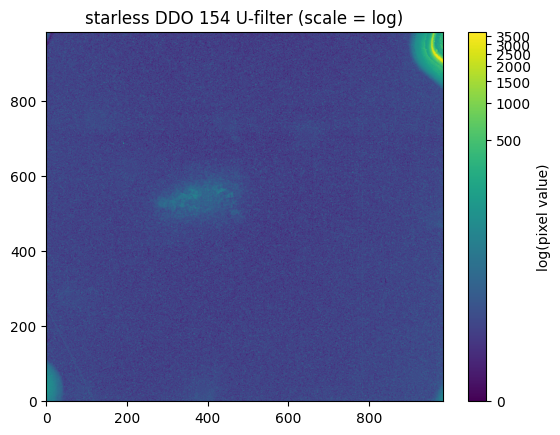

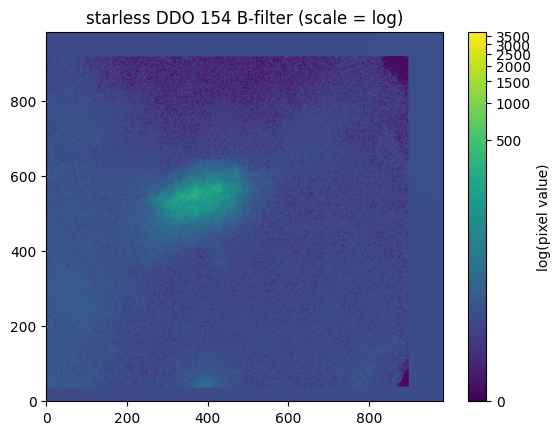

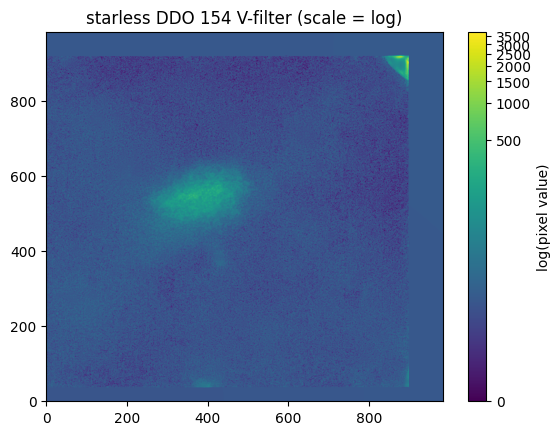

In [4]:
# import starless files----------------------------------------------------------------------------------------------------------------------------------------------------
starless_file_u = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy/Code\d69\starless1\starless_DDO69_U_background_subtracted.fit")
starless_u = starless_file_u[0].data
starless_u[starless_u <= 0] = 1
starless_file_b = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy/Code\d69\starless1\starless_DDO69_B_background_subtracted.fit")
starless_b = starless_file_b[0].data
starless_b[starless_b <= 0] = 1
starless_file_v = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy/Code\d69\starless1\starless_DDO69_V_background_subtracted.fit")
starless_v = starless_file_v[0].data
starless_v[starless_v <= 0] = 1

starless = [starless_u , starless_b , starless_v]

norm = ImageNormalize(vmin=0., stretch=LogStretch())
for i in range(0 , len(starless)):
    
    plt.imshow(starless[i] , origin = "lower" , aspect='auto', norm = norm)
    plt.title('starless DDO 154 %s-filter (scale = log)'%(filters[i]))
    cbar = plt.colorbar()
    cbar.set_label('log(pixel value)')
    plt.show()

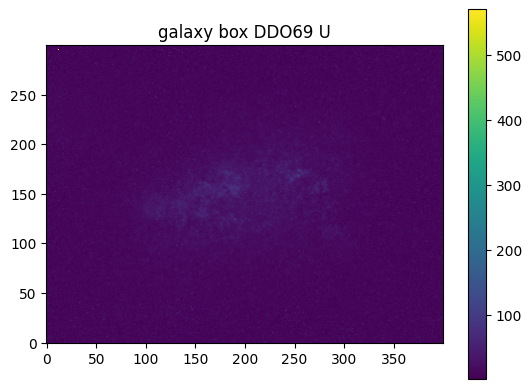

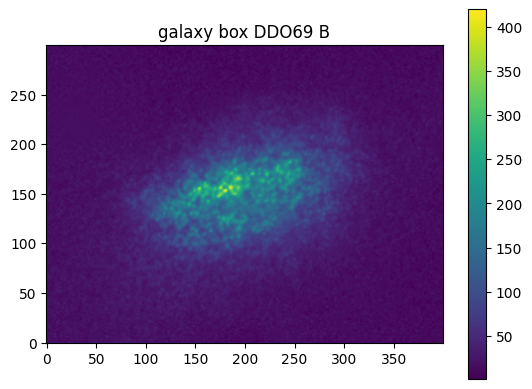

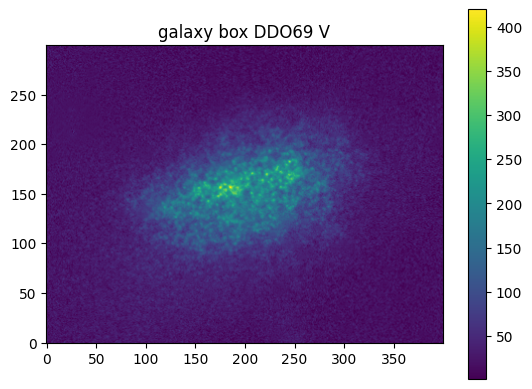

In [5]:
import little_things_functions as ltf
box_size_x = 200
box_size_y = 150
box_center = (540,380)
image_boxes = []
for i in range(0 , len(starless)):
        box = starless[i][540 - box_size_y : 540 + box_size_y, 380 - box_size_x : 380 + box_size_x]
        image_boxes.append(box)
for i in range(0,3):
    plt.imshow(image_boxes[i], origin = "lower")
    plt.title("galaxy box %s %s"%(galaxy_name,filters[i]))
    plt.colorbar()
    plt.show()
v_value_box = image_boxes[2]

In [6]:
#sina
'''
import Galaxy_Processing as GP
import numpy as np
v_value_box = galaxy_boxes[2]
GP.image_show(v_value_box, "v")
smoothed = gaussian_filter(v_value_box,5)
sth  = GP.half_radius_ellipse(smoothed, v_value_box, np.arange(np.min(v_value_box), np.max(v_value_box)),galaxy_name, [80,150], plot = True, fit = False)
'''

'\nimport Galaxy_Processing as GP\nimport numpy as np\nv_value_box = galaxy_boxes[2]\nGP.image_show(v_value_box, "v")\nsmoothed = gaussian_filter(v_value_box,5)\nsth  = GP.half_radius_ellipse(smoothed, v_value_box, np.arange(np.min(v_value_box), np.max(v_value_box)),galaxy_name, [80,150], plot = True, fit = False)\n'

C:\Users\AYSAN\AppData\Local\Temp\ipykernel_580\1210612200.py:10: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for item in contours.collections:


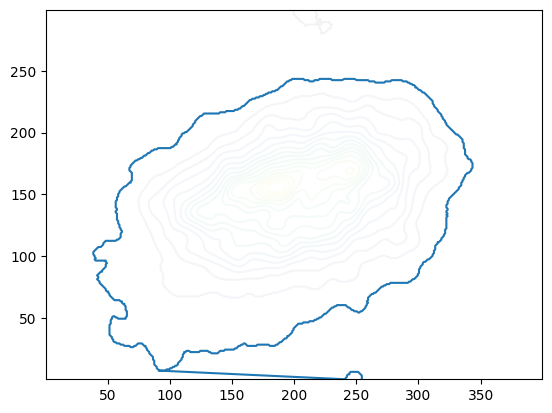

In [7]:
#golta:
v_value_box = image_boxes[2]

smoothed_v_box = gaussian_filter(v_value_box, 5)
contours = plt.contour(smoothed_v_box, origin='lower', alpha=0.05, levels=np.arange(smoothed_v_box.min(), smoothed_v_box.max(), 15))
#contours = plt.contour(data, origin='lower', alpha=0.05)

len_of_ver=[]
path_arr=[]
for item in contours.collections:
    for path in item.get_paths():
        len_of_ver.append(len(path.vertices[:, 0]))
        path_arr.append(path)
    
path_element=np.argmax(len_of_ver)
vertices=path_arr[path_element].vertices
#plt.plot(vertices[:, 0]*pixel_scale, vertices[:, 1]*pixel_scale, color='r', linewidth=1)

x, y = vertices[:, 0], vertices[:, 1]

plt.plot(x,y)


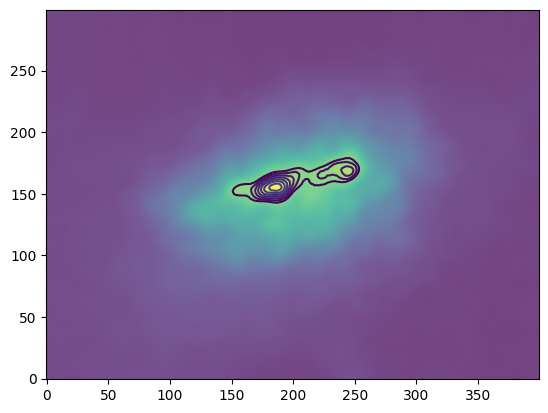

In [8]:
levels = np.asanyarray(np.arange(200, 500, 10))
ltf.contour_lines(v_value_box, 5, levels)

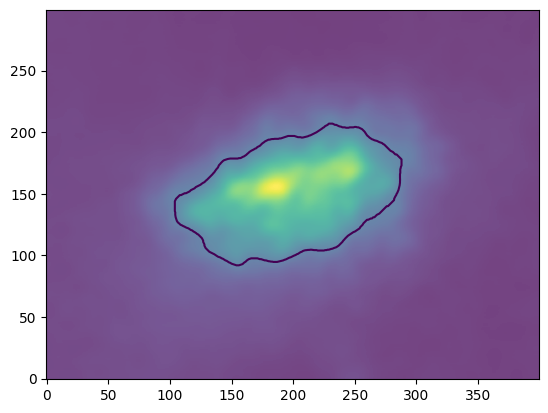

In [9]:
# mine
contour_points = ltf.contour_lines_coordinates(v_value_box, 5, [90])
x_points , y_points = contour_points

(145.4715666711053, 196.24684216223775)
[199.24742097 148.48015112  92.67368281  48.2296812    0.29791098]


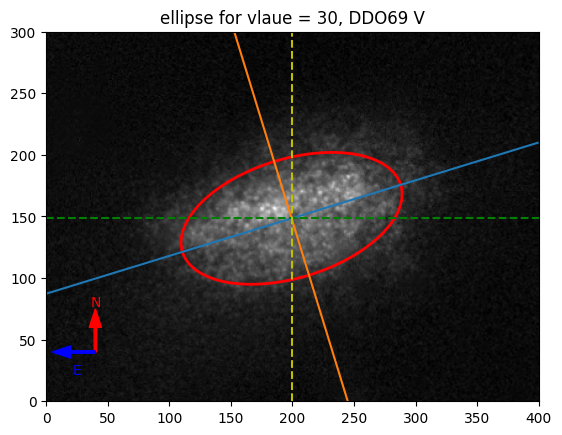

what we are reporting is 17.06904172912804 from the green line toward the semi_major axis
i guess little things is measuring yellow to blue toward east -72.93095827087197
paper = -64


In [10]:
image_center_of_mass = ndimage.center_of_mass(v_value_box)
print(image_center_of_mass)
#coordinates
x, y = image_center_of_mass[1], image_center_of_mass[0]
from scipy.ndimage import gaussian_filter
import cv2
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse
initial_guess = [x, y, (max(x_points) - min(x_points)) / 2 , (max(y_points) - min(y_points)) / 2 , 0]
popt, pcov = curve_fit(ltf.ellipse, (x_points, y_points), np.zeros_like(x_points), p0=initial_guess)
stdv=np.sqrt(np.diag(pcov))
stdvx=stdv[0]
stdvy=stdv[1]
stdva=stdv[2]
stdvb=stdv[3]
stdvpa=stdv[4]

xc, yc, a, b, theta = popt

curve = ltf.ellipse(x_points,popt[0],popt[1],popt[2],popt[3],popt[4])

xc, yc, a, b, theta = popt
print(popt)
# Create a figure and axis
plt.figure()
ax = plt.gca()

# Display the other image
ax.imshow(v_value_box, cmap='gray' , origin = "lower")
angle_in_degrees = np.degrees(theta)
# Create the ellipse
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='r', facecolor='none', linewidth=2)
# Add the ellipse to the axis

ax.add_patch(ellipse)
m = np.tan(theta)
x_ax = np.arange(0,400)
Y_ax = m*(x_ax-xc) + yc
ax.plot(x_ax,Y_ax)

Y_prime_ax = (-1/m)*(x_ax-xc) + yc
ax.plot(x_ax,Y_prime_ax)

plt.axhline(y=yc, color='g', linestyle='--', label='theta = 0')
plt.axvline(x=xc,  color='y', linestyle='--')

# Set axis limits (adjust as needed)
ax.set_xlim(0,v_value_box.shape[1])
ax.set_ylim(0,v_value_box.shape[0])  # Reverse y-axis for imshow
plt.title("ellipse for vlaue = 30, DDO69 V")
# Show the plot
# Example: Add arrows for north and east
plt.arrow(x=40, y=40, dx=0, dy=20, color='red', width=2, head_width=10)
plt.arrow(x=40, y=40, dx=-20, dy=0, color='blue', width=2, head_width=10)
plt.text(40, 80, 'N', color='red', fontsize=10, ha='center', va='center')
plt.text(25, 25, 'E', color='blue', fontsize=10, ha='center', va='center')


plt.show()
import math
angle_in_degrees = math.degrees(theta)

print("what we are reporting is" , angle_in_degrees , "from the green line toward the semi_major axis")
print("i guess little things is measuring yellow to blue toward east" , -1*(90-angle_in_degrees))
print("paper = -64")

C:\Users\AYSAN\AppData\Local\Temp\ipykernel_580\2646981734.py:3: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  from photutils import aperture_photometry


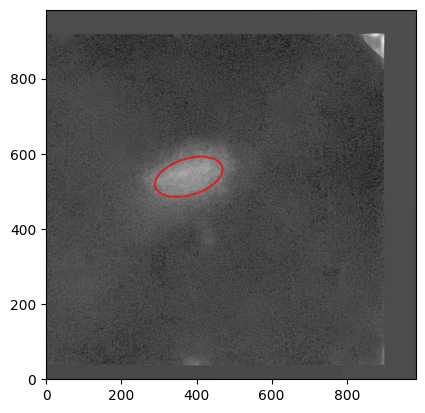

Aperture sum for 'elliptical aperture': 2070255.5


In [11]:
from astropy.coordinates import Angle
from photutils.aperture import EllipticalAperture
from photutils import aperture_photometry
elliptical_center_box = (xc,yc)
new_xc = xc + (box_center[1]-box_size_x)
new_yc = yc + (box_center[0]-box_size_y)
elliptical_center = (new_xc,new_yc)
ellipse_aper = EllipticalAperture(elliptical_center, a, b, theta)
norm = ImageNormalize(vmin=0., stretch=LogStretch())
plt.imshow(starless[2], cmap='gray', origin = "lower" , norm = norm) 
ellipse_aper.plot(color='red', lw=1.5, alpha=0.7) 
plt.show()
phot_table = aperture_photometry(starless[2], ellipse_aper)
aperture_sum_A = phot_table['aperture_sum'][0] 

print(f"Aperture sum for 'elliptical aperture': {aperture_sum_A:.8g}")

C:\Users\AYSAN\AppData\Local\Temp\ipykernel_580\3944444723.py:3: DeprecationWarning: `photutils.EllipticalAperture` is a deprecated alias for `photutils.aperture.EllipticalAperture` and will be removed in the future. Instead, please use `from photutils.aperture import EllipticalAperture` to silence this warning.
  from photutils import EllipticalAperture, aperture_photometry
C:\Users\AYSAN\AppData\Local\Temp\ipykernel_580\3944444723.py:3: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  from photutils import EllipticalAperture, aperture_photometry


Aperture sums: [5.434955290710342e-10, 905.9864304223729, 3796.4606726958873, 8793.002103634402, 16336.329326095472, 26652.379597573134, 39399.404435902456, 54811.21068513035, 72698.5565432851, 93374.50226062459, 116588.31301384587, 142026.7464834933, 168878.10936444576, 197559.1769359799, 228690.43286793935, 262480.30156179785, 298737.1336047073, 336111.66003485234, 375215.8723295514, 416523.66652242164, 460015.23440289474, 505484.1648474527, 551538.6192985114, 598050.897715867, 646751.2684125092, 697308.6130574574, 749155.1947681551, 801844.8517565114, 856305.7140923364, 912217.9809774512, 968492.0655602925, 1025318.956238523, 1083069.805187277, 1141361.859508455, 1200991.48522837, 1260327.4033770554, 1318414.4126259345, 1375260.4038600866, 1431376.9597902305, 1488904.0554807254, 1548663.1769580531, 1607820.3855570867, 1665082.5434413133, 1721629.773741678, 1778388.1896375925, 1834454.3599513453, 1889238.27039937, 1942848.4059622367, 1994464.7174605024, 2045125.001167427, 2095317.105

Text(0.5, 1.0, ' curve of growth for DDO69')

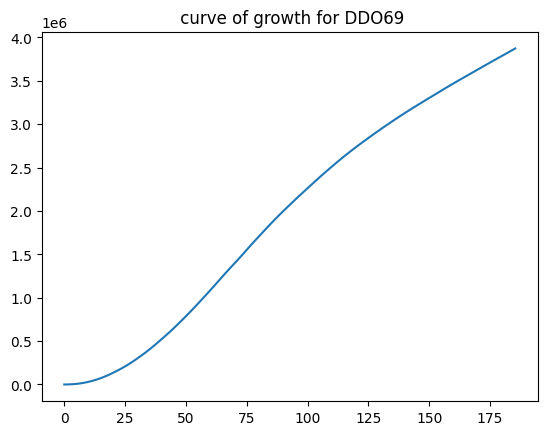

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from photutils import EllipticalAperture, aperture_photometry

# Assuming you have defined 'a', 'b', 'theta', 'elliptical_center', and 'v_value_box'
ab_ratio = a / b
ba_ratio = b / a
a_list = np.linspace(0, 2 * a, 100)
b_list = ba_ratio * a_list

sum_values = []

for i in range(len(a_list)):
    # Ensure positive scalar values for major and minor axes
    a_i = max(a_list[i], 1e-6)  # Avoid zero or negative values
    b_i = max(b_list[i], 1e-6)
    ellipse_aper = EllipticalAperture(elliptical_center, a_i, b_i, theta)
    '''
    plt.imshow(starless[2], cmap='gray')  # Replace 'image_data' with your data
    ellipse_aper.plot(color='red', lw=1.5, alpha=0.7)  # Overlay the aperture
    plt.show()
    '''
    # Compute the aperture sum
    phot_table = aperture_photometry(starless[2], ellipse_aper)
    aperture_sum_A = phot_table['aperture_sum'][0]
    sum_values.append(aperture_sum_A)

print("Aperture sums:", sum_values)

plt.plot(a_list , sum_values)
plt.title(" curve of growth for DDO69")


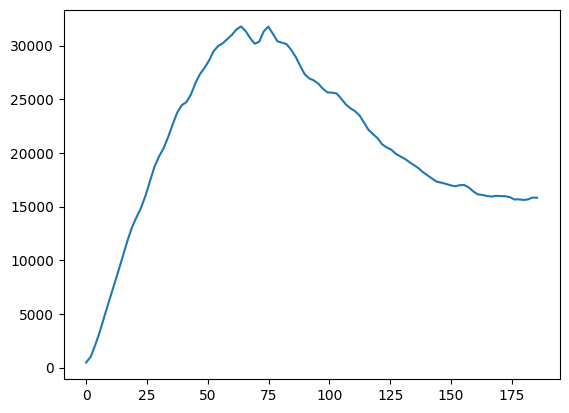

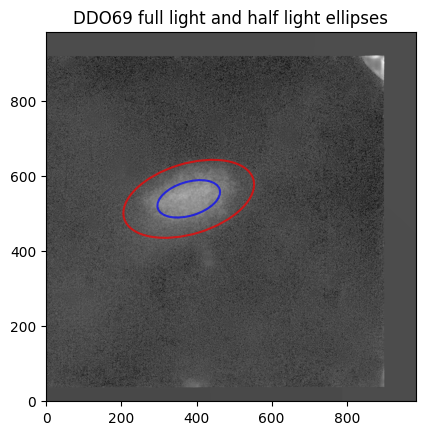

galaxy parameter a =  179.73077878676625 and galaxy parameter b =  93.53635141459493
galaxy count 3784935.7955061
galaxy half light a =  86.12099816865883 and galaxy half light b =  44.8195017194934
half light count 1889238.27039937
0.499146715419185


In [13]:
gradient_sum = np.gradient(sum_values, a_list)
plt.plot(a_list, gradient_sum)
plt.show()
import numpy as np
from scipy.signal import find_peaks
peaks, _ = find_peaks(gradient_sum)
peak_index = peaks[0]
min_after_peak = np.min(gradient_sum[peak_index + 1:])
min_index_after_peak = np.where(gradient_sum == min_after_peak)[0][0]

galaxy_parameter_a = a_list[min_index_after_peak]
galaxy_parameter_b = galaxy_parameter_a*ba_ratio
whole_galaxy = sum_values[min_index_after_peak]

half_light_estimated = whole_galaxy/2
half_light_index = min(range(len(sum_values)), key=lambda i: abs(sum_values[i] - half_light_estimated))

a_half_light = a_list[half_light_index]
b_half_light = a_half_light * ba_ratio

ellipse_aper_full_light = EllipticalAperture(elliptical_center, galaxy_parameter_a, galaxy_parameter_b, theta)
ellipse_aper_half_light = EllipticalAperture(elliptical_center, a_half_light, b_half_light, theta)
norm = ImageNormalize(vmin=0., stretch=LogStretch())
plt.imshow(starless[2], cmap='gray', origin = "lower" , norm = norm) 
ellipse_aper_full_light.plot(color='red', lw=1.5, alpha=0.7) 
ellipse_aper_half_light.plot(color='blue', lw=1.5, alpha=0.7)
plt.title("%s full light and half light ellipses" %(galaxy_name))
plt.show()

print("galaxy parameter a = ", galaxy_parameter_a, "and galaxy parameter b = " , galaxy_parameter_b)
print("galaxy count", sum_values[min_index_after_peak])
print("galaxy half light a = ", a_half_light, "and galaxy half light b = " , b_half_light)
print("half light count", sum_values[half_light_index])
ratio = sum_values[half_light_index]/whole_galaxy
print(ratio)

In [21]:
pixel_scale = 1.134
D = 0.8 

a_half_light_arcsec = a_half_light * pixel_scale
RV_half = (D * a_half_light_arcsec)/206265

print("RV1/2 for DDO69 is: ", RV_half*(10**3), "kpc")
print("paper value is 0.37 kpc")

a_kpc = 0.37
a_half_paper = (a_kpc *206265)/(D*pixel_scale*10**3)
print("a_half_paper_pixels", a_half_paper)

RV1/2 for DDO69 is:  0.3787795774300405 kpc
paper value is 0.37 kpc
a_half_paper_pixels 84.12483465608466


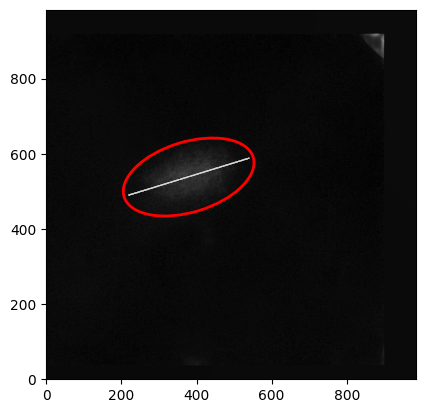

In [15]:
new_xc = int(new_xc)
new_yc = int(new_yc)
x_ax_left = np.arange(220, new_xc)
x_ax_right = np.arange(new_xc, 540)
import copy
duplicated_array = copy.copy(starless[2])
def get_line_values(array, yc, x_ax):
    values = []
    for x in x_ax:
        y = int(m * (x) + yc - m*new_xc)
        values.append(array[y, x])
        duplicated_array = copy.copy(array)
        array[y, x] = 65535
            
    return values

norm = ImageNormalize(vmin=0., stretch=LogStretch())
plt.figure()
ax = plt.gca()
values_along_line_left = get_line_values(starless[2], new_yc, x_ax_left)
values_along_line_right = get_line_values(starless[2], new_yc, x_ax_right)

# Display the other image
ax.imshow(starless[2], cmap='gray' , origin = "lower", norm = norm)
angle_in_degrees = np.degrees(theta)
# Create the ellipse
ellipse = Ellipse(xy=(new_xc, new_yc), width=2*galaxy_parameter_a, height=2*galaxy_parameter_b, angle=np.degrees(theta), edgecolor='r', facecolor='none', linewidth=2)
# Add the ellipse to the axis
ax.add_patch(ellipse)


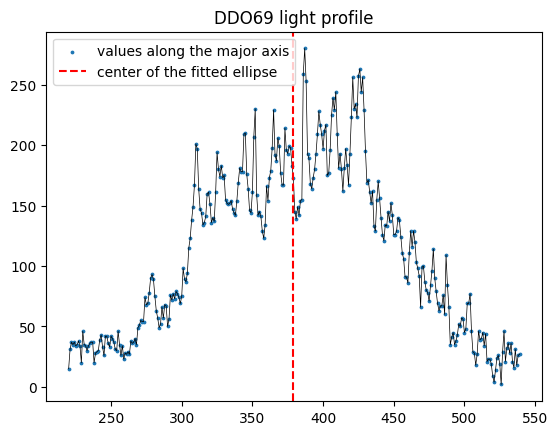

In [16]:
values_along_line = values_along_line_left + values_along_line_right
x_ax = np.arange(np.min(x_ax_left), np.max(x_ax_right)+1)
plt.scatter(x_ax , values_along_line, s = 3, label='values along the major axis')
plt.plot(x_ax , values_along_line, color = "black" , linewidth = 0.5)
plt.axvline(x=new_xc, color='r', linestyle='--', label='center of the fitted ellipse')
plt.title("DDO69 light profile")
plt.legend()

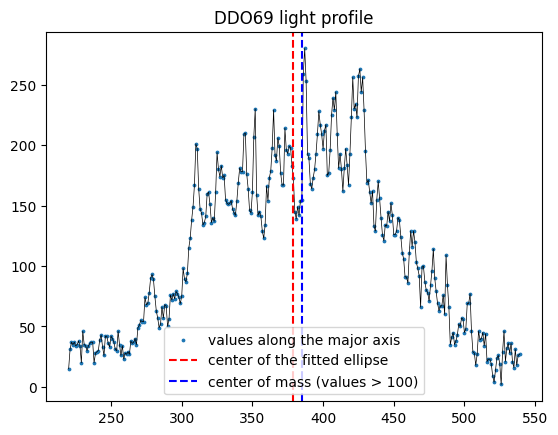

Center of mass of data points with values larger than 100: 384


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming values_along_line_left and values_along_line_right are already defined
values_along_line = values_along_line_left + values_along_line_right
values_along_line = np.array(values_along_line)  # Convert to NumPy array
x_ax = np.arange(np.min(x_ax_left), np.max(x_ax_right) + 1)

# Get the data points with values larger than 100
mask = values_along_line > 100
values_above_100 = values_along_line[mask]
x_above_100 = x_ax[mask]

# Calculate the center of mass
center_of_mass = np.sum(x_above_100 * values_above_100) / np.sum(values_above_100)

# Plotting the data
plt.scatter(x_ax, values_along_line, s=3, label='values along the major axis')
plt.plot(x_ax, values_along_line, color="black", linewidth=0.5)
plt.axvline(x=new_xc, color='r', linestyle='--', label='center of the fitted ellipse')
plt.axvline(x=center_of_mass, color='b', linestyle='--', label='center of mass (values > 100)')
plt.title("DDO69 light profile")
plt.legend()
plt.show()
center_of_mass = int(center_of_mass)
# Print the center of mass
print("Center of mass of data points with values larger than 100:", center_of_mass)


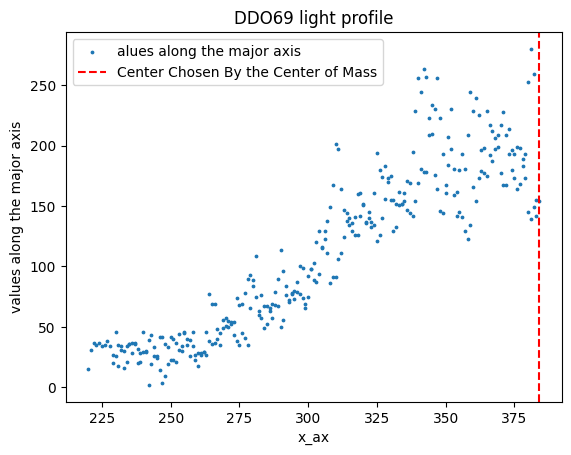

In [18]:
# Initialize the new lists
x_ax_left = []
x_ax_right = []
values_along_line_left = []
values_along_line_right = []

# Split the lists based on center_of_mass
for x, y in zip(x_ax, values_along_line):
    if x < center_of_mass:
        x_ax_left.append(x)
        values_along_line_left.append(y)
    else:
        x_ax_right.append(x)
        values_along_line_right.append(y)
x_ax_mirrored = x_ax_left + [2 * center_of_mass - x for x in x_ax_right]
values_along_line_mirrored = values_along_line_left + values_along_line_right

# Plotting
plt.scatter(x_ax_mirrored, values_along_line_mirrored, s = 3,label='alues along the major axis')
plt.axvline(x=center_of_mass, color='red', linestyle='--', label='Center Chosen By the Center of Mass')
plt.xlabel('x_ax')
plt.ylabel('values along the major axis')
plt.title('DDO69 light profile')
plt.legend()
plt.show()

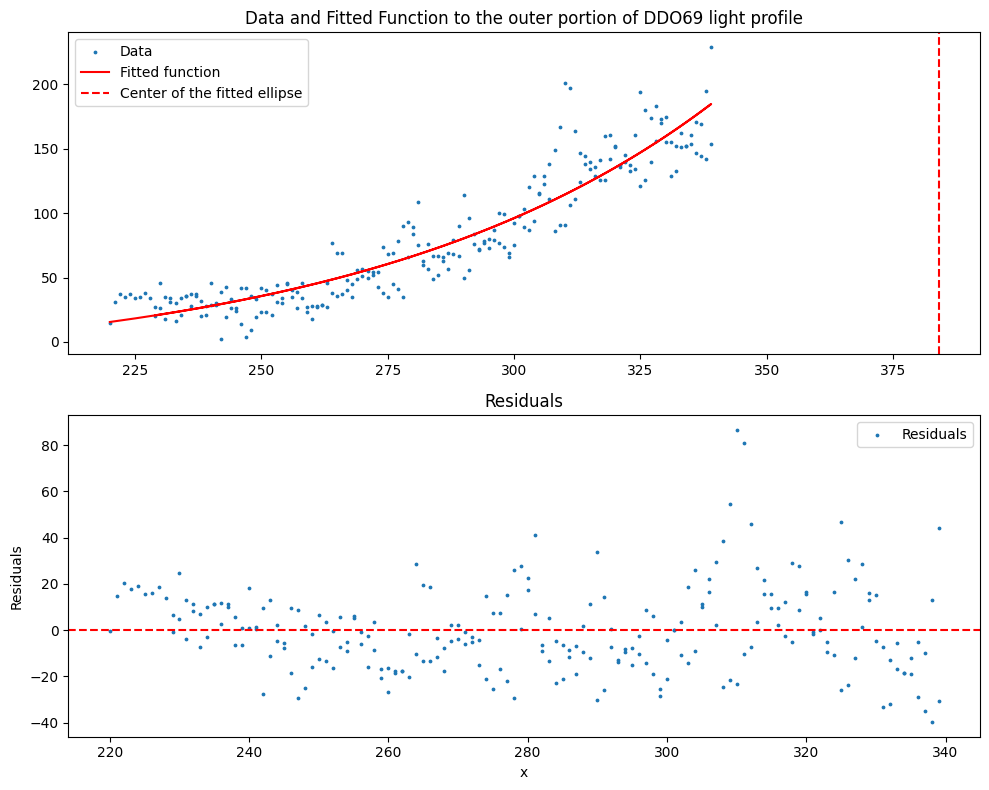

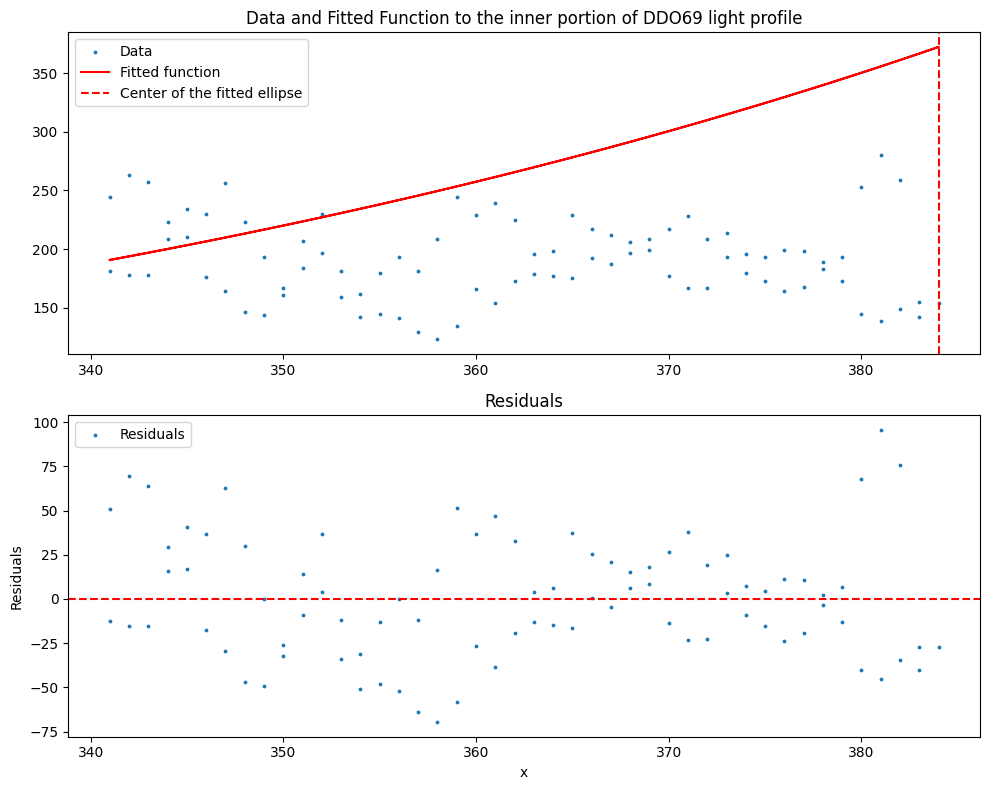

Exponential fit function is a * exp(b * (x - x0)) + c, for the outer portion:
a is 1.6029 +/- 0.0000
b is 0.0144 +/- 0.2963
c is -21.9252 +/- 8.4944
x0 is 0.5690 +/- 25711.8036
b is 0.0144 +/- 0.2963
1/b is 69.6486
Exponential fit function is a * exp(b * (x - x0)) + c, for the inner portion:
a is -0.0000 +/- 0.0000
b is 0.1000 +/- 0.2963
c is 193.5848 +/- 8.4944
x0 is 0.0045 +/- 25711.8036
b is 0.1000 +/- 0.2963
1/b is 10.0000


In [19]:
def exponential_func(x, a, b, c, x0):
    return a * np.exp(b * (x - x0)) + c

# Filter points for inner exponential 
inner_points = [(x, y) for x, y in zip(x_ax_mirrored, values_along_line_mirrored) if x < 340]
inner_x_ax, inner_y_ax = zip(*inner_points) if inner_points else ([], [])

outer_points = [(x, y) for x, y in zip(x_ax_mirrored, values_along_line_mirrored) if x > 340]
outer_x_ax, outer_y_ax = zip(*outer_points) if outer_points else ([], [])

# Provide initial guesses for the parameters
initial_guess = [[45, 0.1, 25, 0]]
popt_inner, pcov = curve_fit(exponential_func, inner_x_ax, inner_y_ax, initial_guess) 
# Plot the original data and the fitted function
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.scatter(inner_x_ax, inner_y_ax, s=3, label='Data')
plt.plot(inner_x_ax, exponential_func(inner_x_ax, *popt_inner), label='Fitted function', color='red')
plt.axvline(x=center_of_mass, color='r', linestyle='--', label='Center of the fitted ellipse')
plt.legend()
plt.title('Data and Fitted Function to the outer portion of DDO69 light profile')
# Calculate residuals
residuals = inner_y_ax - exponential_func(inner_x_ax, *popt_inner)
# Plot the residuals
plt.subplot(2, 1, 2)
plt.scatter(inner_x_ax, residuals, s=3, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


# Provide initial guesses for the parameters
initial_guess = [[45, 0.1, 25, 0]]
popt_outer, pcov = curve_fit(exponential_func, outer_x_ax, outer_y_ax, initial_guess)
# Plot the original data and the fitted function
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.scatter(outer_x_ax, outer_y_ax, s=3, label='Data')
plt.plot(outer_x_ax, exponential_func(outer_x_ax, *popt_inner), label='Fitted function', color='red')
plt.axvline(x=center_of_mass, color='r', linestyle='--', label='Center of the fitted ellipse')
plt.legend()
plt.title('Data and Fitted Function to the inner portion of DDO69 light profile')


# Calculate residuals
residuals_outer = outer_y_ax - exponential_func(outer_x_ax, *popt_outer)

# Plot the residuals
plt.subplot(2, 1, 2)
plt.scatter(outer_x_ax, residuals_outer, s=3, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Calculate the standard deviation errors on the parameters
perr = np.sqrt(np.diag(pcov))
print("Exponential fit function is a * exp(b * (x - x0)) + c, for the outer portion:" )
print(f"a is {popt_inner[0]:.4f} +/- {perr[0]:.4f}")
print(f"b is {popt_inner[1]:.4f} +/- {perr[1]:.4f}")
print(f"c is {popt_inner[2]:.4f} +/- {perr[2]:.4f}")
print(f"x0 is {popt_inner[3]:.4f} +/- {perr[3]:.4f}")

print(f"b is {popt_inner[1]:.4f} +/- {perr[1]:.4f}")
print(f"1/b is {1/popt_inner[1]:.4f}")


print("Exponential fit function is a * exp(b * (x - x0)) + c, for the inner portion:" )
print(f"a is {popt_outer[0]:.4f} +/- {perr[0]:.4f}")
print(f"b is {popt_outer[1]:.4f} +/- {perr[1]:.4f}")
print(f"c is {popt_outer[2]:.4f} +/- {perr[2]:.4f}")
print(f"x0 is {popt_outer[3]:.4f} +/- {perr[3]:.4f}")

print(f"b is {popt_outer[1]:.4f} +/- {perr[1]:.4f}")
print(f"1/b is {1/popt_outer[1]:.4f}")


In [20]:
def exponential_func(x, a, b, c, x0):
    return a * np.exp(b * (x - x0)) + c

# Provide initial guesses for the parameters
initial_guesses = [45, 0.1, 25, 0]
popt, pcov = curve_fit(exponential_func, x_ax_mirrored, values_along_line_mirrored, p0=initial_guesses)

# Plot the original data and the fitted function
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.scatter(x_ax_mirrored, values_along_line_mirrored, s=3, label='Data')
plt.plot(x_ax_mirrored, exponential_func(x_ax_mirrored, *popt), label='Fitted function', color='red')
plt.axvline(x=center_of_mass, color='r', linestyle='--', label='Center of the fitted ellipse')
plt.legend()
plt.title('Data and Fitted Function to the DDO69 light profile')

# Calculate residuals
residuals = values_along_line_mirrored - exponential_func(x_ax_mirrored, *popt)

# Plot the residuals
plt.subplot(2, 1, 2)
plt.scatter(x_ax_mirrored, residuals, s=3, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Calculate the standard deviation errors on the parameters
perr = np.sqrt(np.diag(pcov))
print("Exponential fit function is a * exp(b * (x - x0)) + c")
print(f"a is {popt[0]:.4f} +/- {perr[0]:.4f}")
print(f"b is {popt[1]:.4f} +/- {perr[1]:.4f}")
print(f"c is {popt[2]:.4f} +/- {perr[2]:.4f}")
print(f"x0 is {popt[3]:.4f} +/- {perr[3]:.4f}")

print(f"b is {popt[1]:.4f} +/- {perr[1]:.4f}")
print(f"1/b is {1/popt[1]:.4f}")


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [62]:
"""
x_ax = np.arange(220, 550)
all_values_along_line = get_line_values(starless[2], new_yc, x_ax)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Split the data into left and right halves
mid_index = new_xc
x_left = x_ax[:mid_index]
y_left = all_values_along_line[:mid_index]

# Generate fitted values for the left half
y_fitted_left = exponential_func(x_left, *popt)

# Reflect the x values to create symmetric x values for the right half
x_right = x_ax[mid_index:]
x_reflected = 2 * x_left[-1] - x_right

# Use the fitted parameters to generate symmetric y values
y_fitted_right = exponential_func(x_reflected, *popt)

plt.scatter(x_ax, all_values_along_line, label='Data')
plt.plot(x_left, y_fitted_left, label='Fitted function (left half)', color='red')
plt.plot(x_right, y_fitted_right, label='Symmetric fit (right half)', color='green')
plt.legend()
plt.show()
"""


"\nx_ax = np.arange(220, 550)\nall_values_along_line = get_line_values(starless[2], new_yc, x_ax)\nimport numpy as np\nfrom scipy.optimize import curve_fit\nimport matplotlib.pyplot as plt\n\n# Split the data into left and right halves\nmid_index = new_xc\nx_left = x_ax[:mid_index]\ny_left = all_values_along_line[:mid_index]\n\n# Generate fitted values for the left half\ny_fitted_left = exponential_func(x_left, *popt)\n\n# Reflect the x values to create symmetric x values for the right half\nx_right = x_ax[mid_index:]\nx_reflected = 2 * x_left[-1] - x_right\n\n# Use the fitted parameters to generate symmetric y values\ny_fitted_right = exponential_func(x_reflected, *popt)\n\nplt.scatter(x_ax, all_values_along_line, label='Data')\nplt.plot(x_left, y_fitted_left, label='Fitted function (left half)', color='red')\nplt.plot(x_right, y_fitted_right, label='Symmetric fit (right half)', color='green')\nplt.legend()\nplt.show()\n"

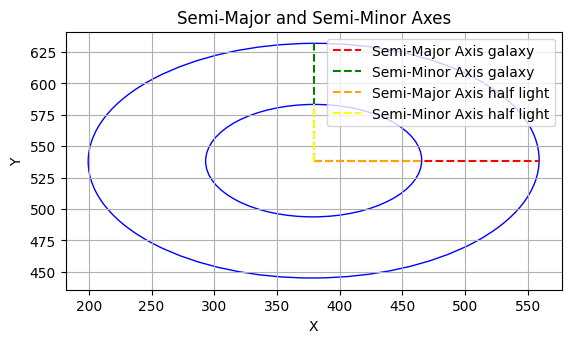

In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Define ellipse parameters
h, k = elliptical_center  # Center coordinates

theta = theta  # Angle of rotation (if any)

# Create an ellipse
ellipse_galaxy = Ellipse((h, k), 2 * galaxy_parameter_a, 2 * galaxy_parameter_b, angle=theta, fill=False, color='blue')
ellipse_half = Ellipse((h, k), 2 * a_half_light, 2 * b_half_light, angle=theta, fill=False, color='blue')
# Set up the plot
fig, ax = plt.subplots()
ax.add_patch(ellipse_galaxy)
ax.add_patch(ellipse_half)
ax.set_aspect('equal')  # Equal aspect ratio for x and y axes
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Semi-Major and Semi-Minor Axes')
plt.grid(True)

# Draw semi-major and semi-minor axes
ax.plot([h, h + galaxy_parameter_a], [k, k], color='red', linestyle='--', label='Semi-Major Axis galaxy')
ax.plot([h, h], [k, k + galaxy_parameter_b], color='green', linestyle='--', label='Semi-Minor Axis galaxy')

ax.plot([h, h + a_half_light], [k, k], color='orange', linestyle='--', label='Semi-Major Axis half light')
ax.plot([h, h], [k, k + b_half_light], color='yellow', linestyle='--', label='Semi-Minor Axis half light')

# Show the legend
ax.legend()

# Display the plot
plt.show()


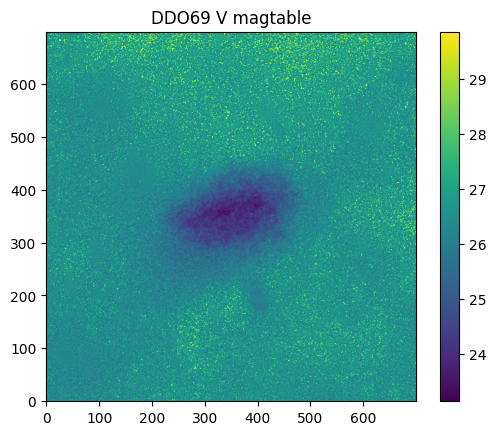

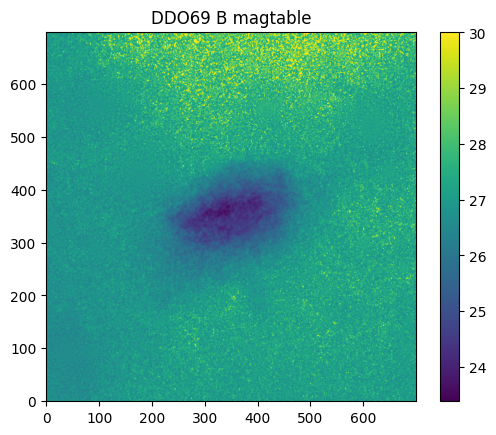

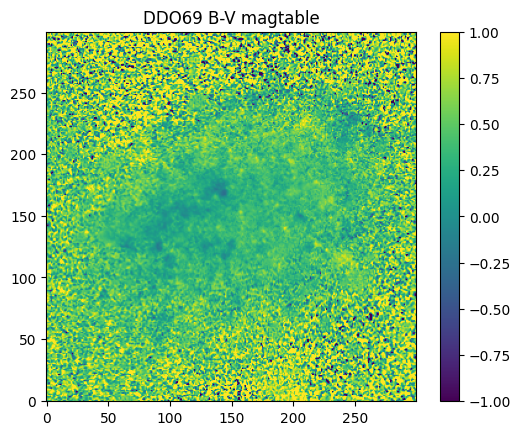

maximum B-V magnitude for DDO69 is 4.6635845730640035 magnitude per arcsec^2


In [26]:
pixel_scale = 1.134
exposures = [1800, 2400, 1200]
airmass_values=[1.22, 1.04, 1.1]
mU_values = [5.251, 0.459, -0.121, 0]
mV_values = [3.009, 0.2183592, 0.0415, 0.]
mB_values = [3.434, 0.3398903,-0.0157, 0.]
m_values = [mU_values,mB_values,mV_values]

starless[2] = duplicated_array

galaxy_boxes = ltf.get_boxes(starless,[new_xc,new_yc], 700)
V_mag = ltf.mag_table_correction(galaxy_boxes,airmass_values,m_values,pixel_scale,exposures)[2]
plt.imshow(ltf.mag_table_correction(galaxy_boxes,airmass_values,m_values,pixel_scale,exposures)[2] , origin="lower")
plt.title("DDO69 V magtable")
plt.colorbar()
plt.show()
B_mag = ltf.mag_table_correction(galaxy_boxes,airmass_values,m_values,pixel_scale,exposures)[1]
plt.imshow(ltf.mag_table_correction(galaxy_boxes,airmass_values,m_values,pixel_scale,exposures)[1] , origin="lower")
plt.title("DDO69 B magtable")
plt.colorbar()
plt.show()

B_minus_V = np.array(B_mag - V_mag)
B_minus_v_box =  B_minus_V[350 - 150 : 350 + 150, 350 - 150 : 350 + 150]
plt.imshow(B_minus_v_box, origin="lower" , vmin = -1,  vmax = +1)

plt.title("DDO69 B-V magtable")
plt.colorbar()
plt.show()

print("maximum B-V magnitude for DDO69 is",np.max(B_minus_V), "magnitude per arcsec^2")

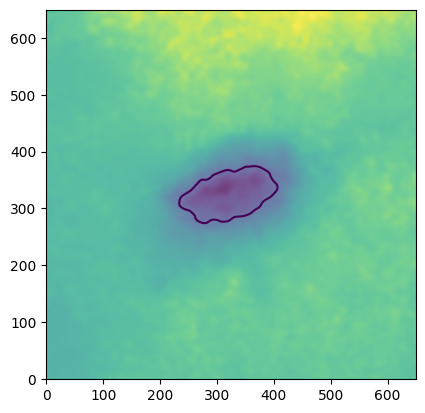

(326.07067022011046, 325.6169666321448)


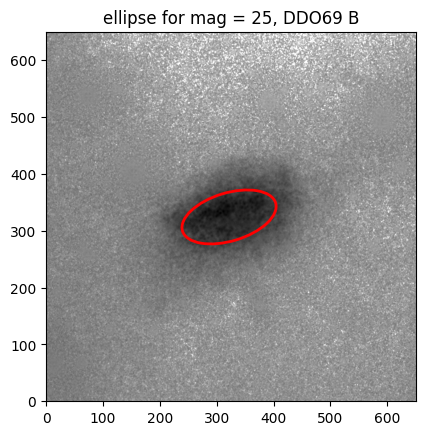

RB 25 for DDO69 is:  0.376118815425561 kpc
paper value is 0.30 kpc


In [39]:
b_box = ltf.mag_table_correction(galaxy_boxes,airmass_values,m_values,pixel_scale,exposures)[1]
contour_points = ltf.contour_lines_coordinates(b_box, 5, [25])
x_points , y_points = contour_points
plt.show()
image_center_of_mass = ndimage.center_of_mass(b_box)
print(image_center_of_mass)
#coordinates
x, y = image_center_of_mass[1], image_center_of_mass[0]
from scipy.ndimage import gaussian_filter
import cv2
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse

initial_guess = [x, y, (max(x_points) - min(x_points)) / 2 , (max(y_points) - min(y_points)) / 2 , 0]
popt_25, pcov_25 = curve_fit(ltf.ellipse, (x_points, y_points), np.zeros_like(x_points), p0=initial_guess)
stdv=np.sqrt(np.diag(pcov_25))
stdvx=stdv[0]
stdvy=stdv[1]
stdva=stdv[2]
stdvb=stdv[3]
stdvpa=stdv[4]


curve = ltf.ellipse(x_points,popt_25[0],popt_25[1],popt_25[2],popt_25[3],popt_25[4])

xc, yc, a, b, theta = popt_25


# Create a figure and axis
plt.figure()
ax = plt.gca()

# Display the other image
ax.imshow(b_box, cmap='gray' , origin = "lower")

# Create the ellipse
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='r', facecolor='none', linewidth=2)

# Add the ellipse to the axis
ax.add_patch(ellipse)

# Set axis limits (adjust as needed)
ax.set_xlim(0,b_box.shape[1])
ax.set_ylim(0,b_box.shape[0])  # Reverse y-axis for imshow
plt.title("ellipse for mag = 25, DDO69 B")
# Show the plot
plt.show()

a_25 = popt_25[2]
a_25_arcsec = a_25 * pixel_scale

RB_25 = (D * a_25_arcsec)/206265

print("RB 25 for DDO69 is: ", RB_25*(10**3), "kpc")
print("paper value is 0.30 kpc")

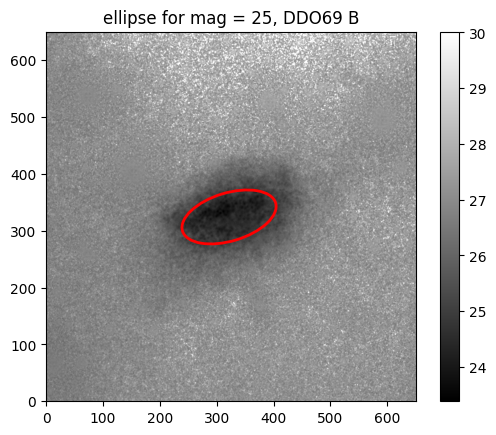

In [40]:
# Create a figure and axis
plt.figure()
ax = plt.gca()

# Display the other image and get the mappable object
mappable = ax.imshow(b_box, cmap='gray', origin='lower')

# Create the ellipse
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='r', facecolor='none', linewidth=2)

# Add the ellipse to the axis
ax.add_patch(ellipse)

# Add the colorbar using the mappable object
plt.colorbar(mappable, ax=ax)

# Set axis limits (adjust as needed)
ax.set_xlim(0, b_box.shape[1])
ax.set_ylim(0, b_box.shape[0])  # Reverse y-axis for imshow
plt.title("ellipse for mag = 25, DDO69 B")

# Show the plot
plt.show()


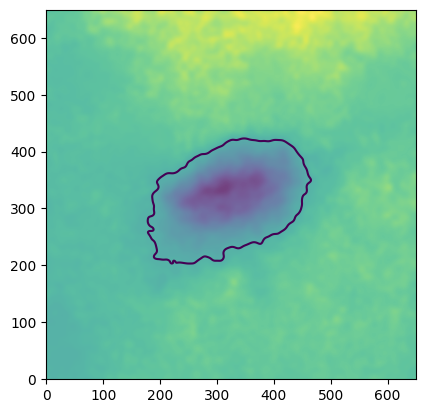

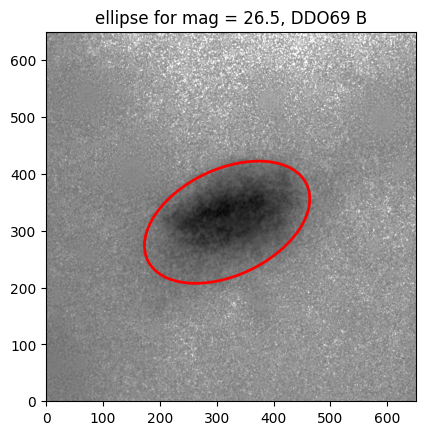

RH for DDO69 is:  0.6814178811075374 kpc
paper value is 0.56 kpc


In [36]:
galaxy_boxes = ltf.get_boxes(starless,[new_xc,new_yc], 650)
b_box = ltf.mag_table_correction(galaxy_boxes,airmass_values,m_values,pixel_scale,exposures)[1]

contour_points = ltf.contour_lines_coordinates(b_box, 5, [26.5])
x_points , y_points = contour_points
plt.show()
image_center_of_mass = ndimage.center_of_mass(b_box)

#coordinates
x, y = image_center_of_mass[1], image_center_of_mass[0]
from scipy.ndimage import gaussian_filter
import cv2
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse

initial_guess = [x, y, (max(x_points) - min(x_points)) / 2 , (max(y_points) - min(y_points)) / 2 , 0]
popt_H, pcov_H = curve_fit(ltf.ellipse, (x_points, y_points), np.zeros_like(x_points), p0=initial_guess)
stdv=np.sqrt(np.diag(popt_H))
stdvx=stdv[0]
stdvy=stdv[1]
stdva=stdv[2]
stdvb=stdv[3]
stdvpa=stdv[4]


curve = ltf.ellipse(x_points,popt_H[0],popt_H[1],popt_H[2],popt_H[3],popt_H[4])

xc, yc, a, b, theta = popt_H


# Create a figure and axis
plt.figure()
ax = plt.gca()

# Display the other image
ax.imshow(b_box, cmap='gray' , origin = "lower")

# Create the ellipse
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='r', facecolor='none', linewidth=2)

# Add the ellipse to the axis
ax.add_patch(ellipse)
# Set axis limits (adjust as needed)
ax.set_xlim(0,b_box.shape[1])
ax.set_ylim(0,b_box.shape[0])  # Reverse y-axis for imshow
plt.title("ellipse for mag = 26.5, DDO69 B")

# Show the plot
plt.show()

a_H = popt_H[2]
a_H_arcsec = a_H * pixel_scale

RB_H = (D * a_H_arcsec)/206265

print("RH for DDO69 is: ", RB_H*(10**3), "kpc")
print("paper value is 0.56 kpc")

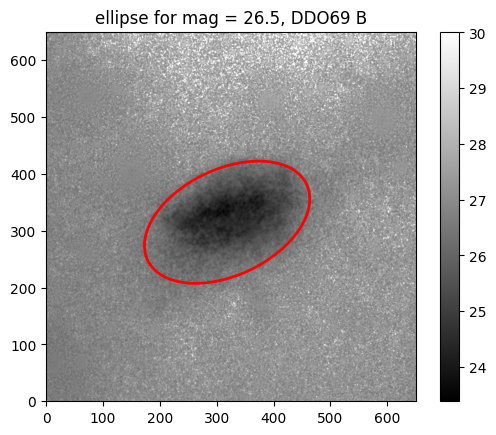

In [37]:
# Create a figure and axis
plt.figure()
ax = plt.gca()

# Display the other image and get the mappable object
mappable = ax.imshow(b_box, cmap='gray', origin='lower')

# Create the ellipse
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='r', facecolor='none', linewidth=2)

# Add the ellipse to the axis
ax.add_patch(ellipse)

# Add the colorbar using the mappable object
plt.colorbar(mappable, ax=ax)

# Set axis limits (adjust as needed)
ax.set_xlim(0, b_box.shape[1])
ax.set_ylim(0, b_box.shape[0])  # Reverse y-axis for imshow
plt.title("ellipse for mag = 26.5, DDO69 B")

# Show the plot
plt.show()
